In [1]:
import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request

import matplotlib as mpl
import matplotlib.pyplot as plt

After importing the necessary libraries, we import the dataset.

In [2]:
path='C:/Users/Rukhsana/Desktop/Heriot-watt university/Coursework/F21DL/FOOD-DATA-GROUP.csv'
data=pd.read_csv(path)

Display the first five instances of the dataset.

In [3]:
data.head()

,No,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,Protein,...,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density
0,0,cream cheese,51,5.0,2.9,1.3,0.200,0.8,0.500,0.9,...,0.008,14.100,0.082,0.027,1.300,0.091,15.5,19.100,0.039,7.070
1,1,neufchatel cheese,215,19.4,10.9,4.9,0.800,3.1,2.700,7.8,...,99.500,0.034,0.100,8.500,0.088,117.300,129.2,0.054,0.700,130.100
2,2,requeijao cremoso light catupiry,49,3.6,2.3,0.9,0.000,0.9,3.400,0.8,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,5.400
3,3,ricotta cheese,30,2.0,1.3,0.5,0.002,1.5,0.091,1.5,...,0.097,41.200,0.097,0.096,4.000,0.024,30.8,43.800,0.035,5.196
4,4,cream cheese low fat,30,2.3,1.4,0.6,0.042,1.2,0.900,1.2,...,22.200,0.072,0.008,1.200,0.098,22.800,37.1,0.034,0.053,27.007


Checking the data information to check if any null values are present.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2395 entries, 0 to 2394
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   No                    2395 non-null   int64  
 1   food                  2395 non-null   object 
 2   Caloric Value         2395 non-null   int64  
 3   Fat                   2395 non-null   float64
 4   Saturated Fats        2395 non-null   float64
 5   Monounsaturated Fats  2395 non-null   float64
 6   Polyunsaturated Fats  2395 non-null   float64
 7   Carbohydrates         2395 non-null   float64
 8   Sugars                2395 non-null   float64
 9   Protein               2395 non-null   float64
 10  Dietary Fiber         2395 non-null   float64
 11  Cholesterol           2395 non-null   float64
 12  Sodium                2395 non-null   float64
 13  Water                 2395 non-null   float64
 14  Vitamin A             2395 non-null   float64
 15  Vitamin B1           

Calculating mean,standard deviation, minimum,maximum and quartile ranges of the attributes

In [5]:
data.describe()

,No,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,Protein,Dietary Fiber,...,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density
count,2395.00000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,...,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000
mean,1197.00000,223.769520,10.176276,3.924917,4.133622,2.152844,18.589021,4.457459,13.400777,2.235790,...,52.047728,9.581689,1.853271,34.429792,5.349964,156.236052,303.833939,52.258006,1.579192,106.929006
std,691.52127,384.728244,29.008915,19.502262,12.939587,7.145738,29.406134,13.339929,32.294246,5.404483,...,115.933379,69.912400,5.155650,71.927990,21.005332,333.257099,589.507589,199.257203,4.937509,173.023891
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,598.50000,44.500000,0.300000,0.064000,0.058000,0.071000,0.500000,0.000000,0.800000,0.000000,...,0.600000,0.040000,0.100000,1.500000,0.037000,0.800000,27.750000,0.016000,0.055000,16.876500
50%,1197.00000,117.000000,2.100000,0.500000,0.500000,0.400000,6.800000,0.086000,3.500000,0.200000,...,13.900000,0.100000,0.600000,10.400000,0.200000,42.300000,112.300000,0.053000,0.300000,53.840000
75%,1795.50000,258.000000,9.400000,2.700000,3.400000,1.700000,25.050000,3.200000,13.300000,2.200000,...,48.250000,0.400000,1.800000,36.950000,0.700000,171.350000,340.500000,0.090000,1.200000,135.074500
max,2394.00000,6077.000000,550.700000,672.000000,291.100000,188.000000,390.200000,291.500000,560.300000,76.500000,...,1283.500000,1890.000000,121.200000,921.600000,451.000000,5490.000000,11336.900000,3308.000000,147.300000,3911.400000


Plotting histogram of the various attributes

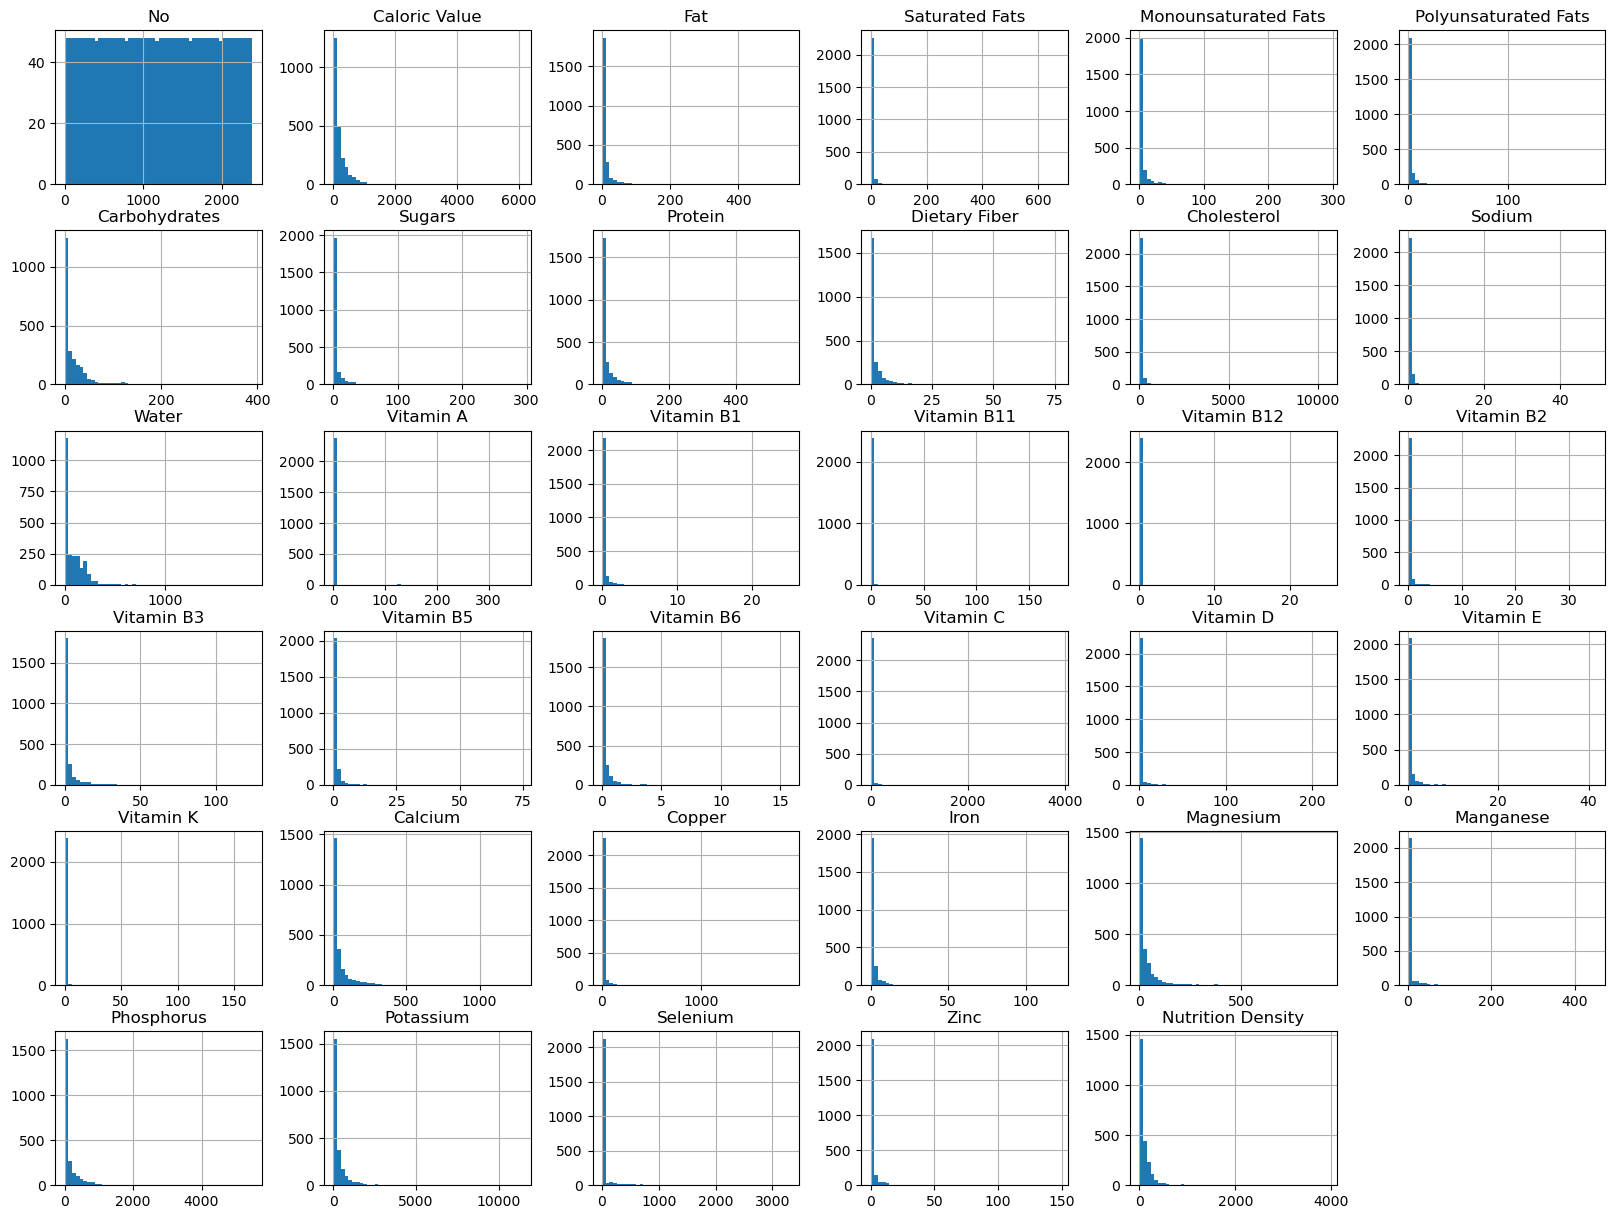

In [6]:
data.hist(bins=50, figsize=(20,15))
plt.show()

Number of instances and attributes can be found out using the shape function

In [7]:
data.shape

(2395, 36)

Scatter plots of the Macronutrients against Caloric Value

<Axes: xlabel='Fat', ylabel='Caloric Value'>

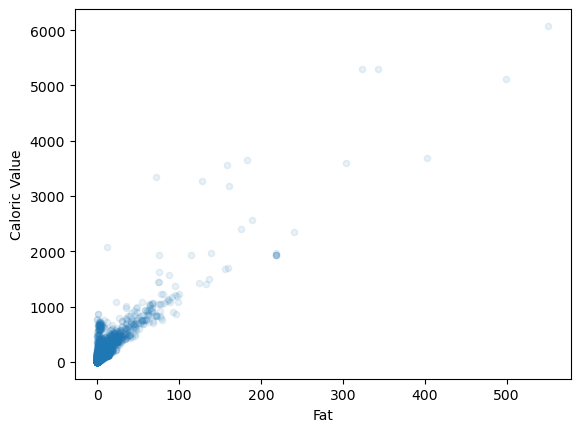

In [8]:
data.plot(kind="scatter", x="Fat", y="Caloric Value", alpha=0.1)

<Axes: xlabel='Protein', ylabel='Caloric Value'>

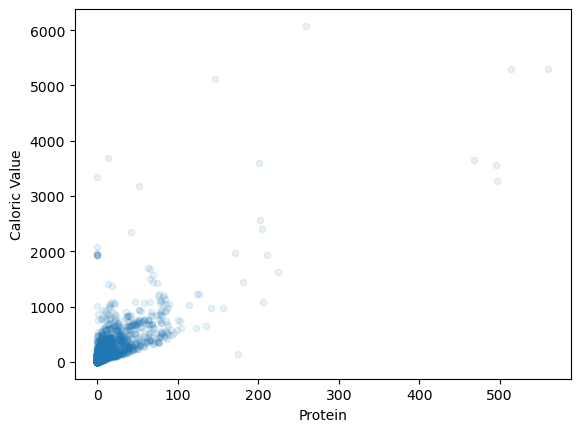

In [9]:
data.plot(kind="scatter", x="Protein", y="Caloric Value", alpha=0.1)

<Axes: xlabel='Carbohydrates', ylabel='Caloric Value'>

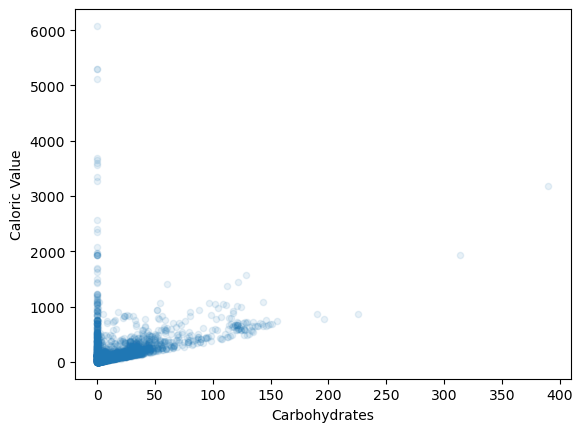

In [10]:
data.plot(kind="scatter", x="Carbohydrates", y="Caloric Value", alpha=0.1)

Correlation of the attributes against each other

In [11]:
df = pd.DataFrame(data)
print (df)

        No                              food  Caloric Value     Fat  \
0        0                      cream cheese             51   5.000   
1        1                 neufchatel cheese            215  19.400   
2        2  requeijao cremoso light catupiry             49   3.600   
3        3                    ricotta cheese             30   2.000   
4        4              cream cheese low fat             30   2.300   
...    ...                               ...            ...     ...   
2390  2390                          jews ear             25   0.095   
2391  2391                   enoki mushrooms              1   0.099   
2392  2392                   morel mushrooms              4   0.070   
2393  2393          portabella mushrooms raw             19   0.300   
2394  2394                   oyster mushroom              5   0.035   

      Saturated Fats  Monounsaturated Fats  Polyunsaturated Fats  \
0              2.900                 1.300                 0.200   
1          

In [12]:
num_data=data.select_dtypes(include=[np.number])
corr_matrix=num_data.corr()
print(corr_matrix)

                            No  Caloric Value       Fat  Saturated Fats  \
No                    1.000000      -0.106808 -0.044039       -0.040558   
Caloric Value        -0.106808       1.000000  0.901783        0.606614   
Fat                  -0.044039       0.901783  1.000000        0.551220   
Saturated Fats       -0.040558       0.606614  0.551220        1.000000   
Monounsaturated Fats -0.036352       0.845348  0.924344        0.550169   
Polyunsaturated Fats -0.011898       0.603871  0.626602        0.328653   
Carbohydrates        -0.103730       0.297667  0.026412       -0.027468   
Sugars               -0.025000       0.118609  0.019477       -0.009464   
Protein              -0.101826       0.748770  0.600596        0.269882   
Dietary Fiber         0.027134       0.152123 -0.013629       -0.029532   
Cholesterol          -0.026368       0.269212  0.252769        0.112380   
Sodium               -0.079657       0.144128  0.127233        0.041113   
Water                -0.0

In [13]:
corr_matrix=num_data.corr()
corr_matrix["Caloric Value"].sort_values(ascending=False)

Caloric Value           1.000000
Fat                     0.901783
Monounsaturated Fats    0.845348
Protein                 0.748770
Phosphorus              0.735810
Vitamin B3              0.693851
Potassium               0.681601
Vitamin B6              0.614840
Saturated Fats          0.606614
Polyunsaturated Fats    0.603871
Nutrition Density       0.535323
Water                   0.534724
Zinc                    0.534415
Magnesium               0.474511
Vitamin B5              0.467535
Vitamin B1              0.391420
Iron                    0.373881
Vitamin B2              0.305870
Carbohydrates           0.297667
Vitamin E               0.270989
Cholesterol             0.269212
Calcium                 0.265974
Dietary Fiber           0.152123
Sodium                  0.144128
Sugars                  0.118609
Selenium                0.067144
Manganese               0.057497
Copper                  0.025887
Vitamin A               0.012179
Vitamin B11             0.008006
Vitamin C 